In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from tabulate import tabulate

df = pd.read_csv("EPL.csv")

In [37]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [38]:
df["TotalGoals"] = df["FullTimeHomeTeamGoals"] + df["FullTimeAwayTeamGoals"]
df["GoalDifference"] = df["FullTimeHomeTeamGoals"] - df["FullTimeAwayTeamGoals"]
df["WinRate"] = df["HomeTeamPoints"] / (df["HomeTeamPoints"] + df["AwayTeamPoints"])

features = df[["TotalGoals", "GoalDifference", "WinRate"]]

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

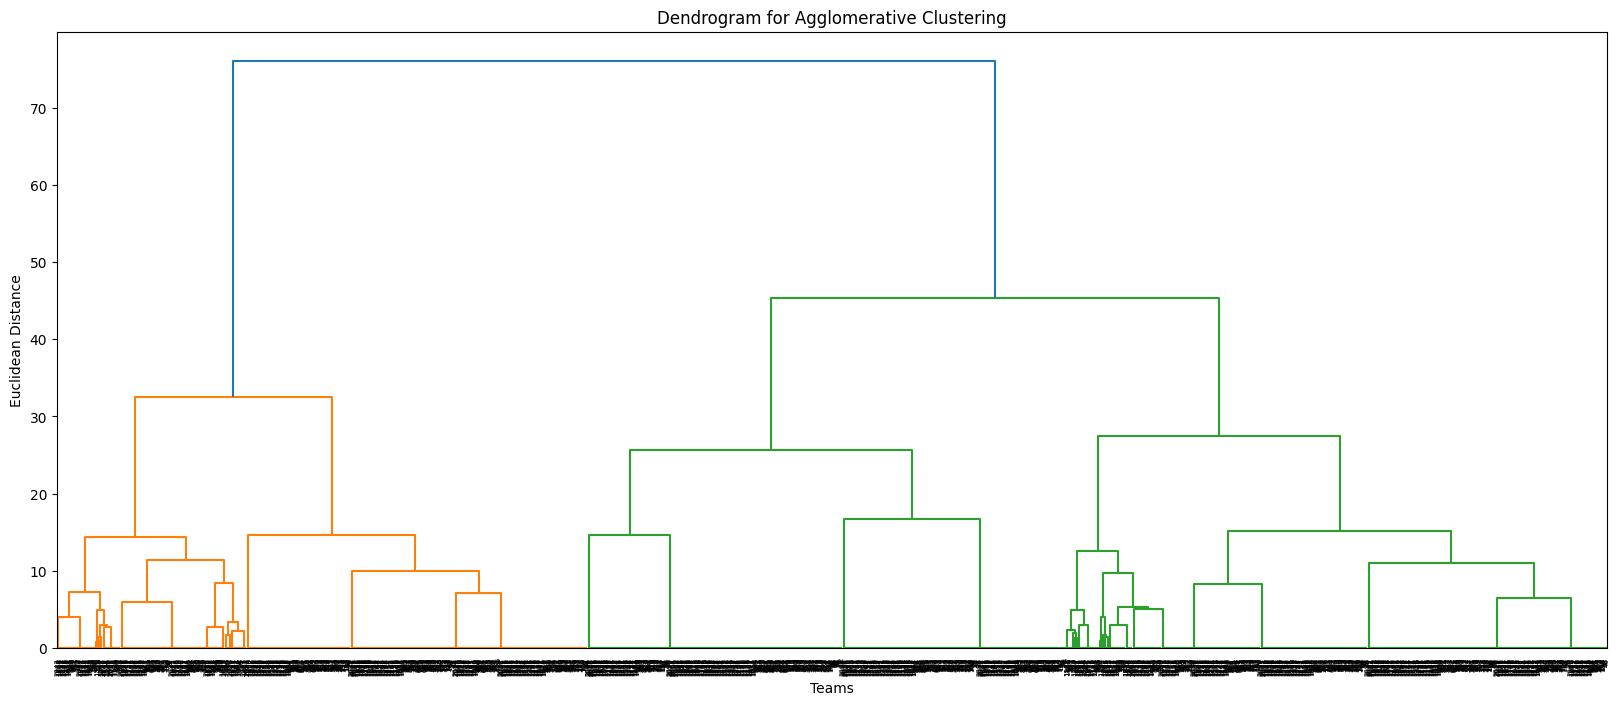

In [40]:
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Teams')
plt.ylabel('Euclidean Distance')
plt.show()

In [41]:
optimal_k = 6
agglo_cluster = AgglomerativeClustering(n_clusters=6, linkage='complete', metric='euclidean')
df["Cluster"] = agglo_cluster.fit_predict(scaled_features)


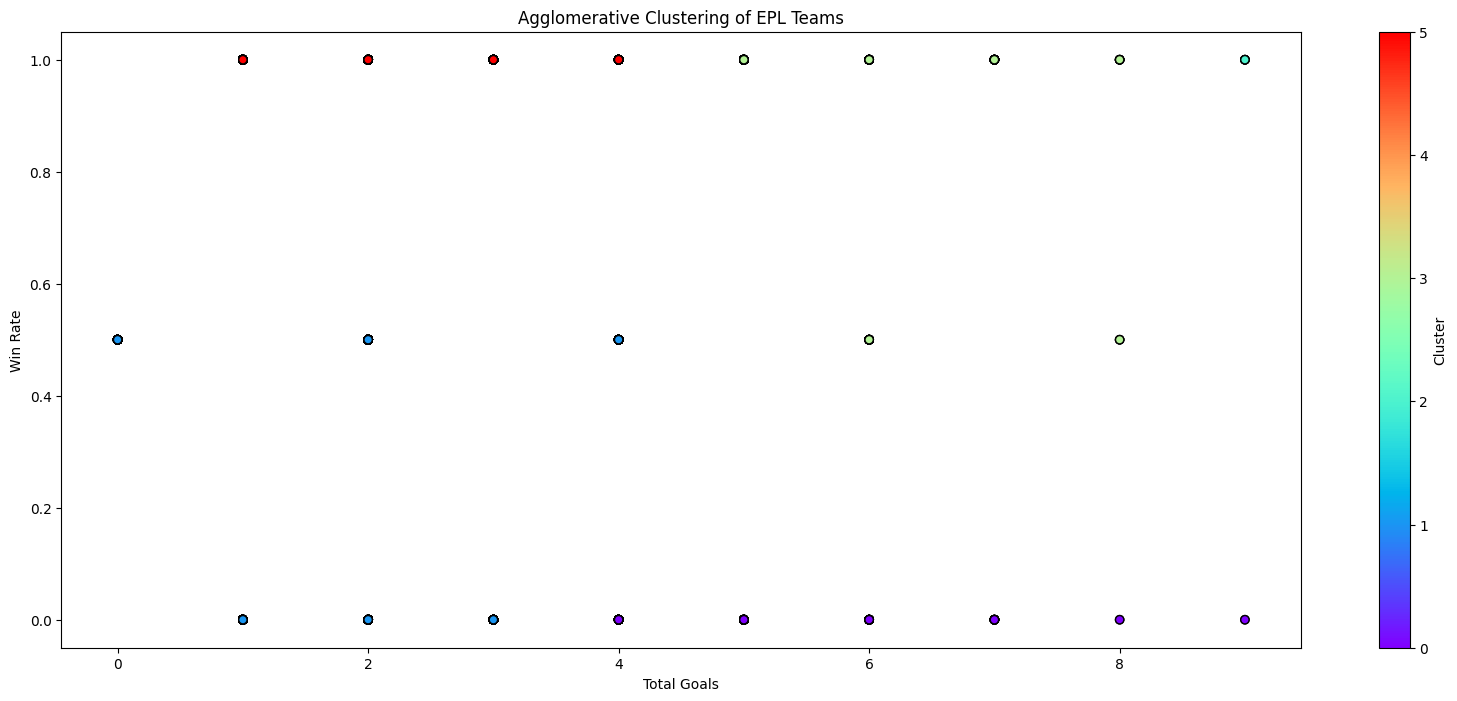

In [42]:
plt.figure(figsize=(20, 8))
plt.scatter(df["TotalGoals"], df["WinRate"], c=df["Cluster"], cmap="rainbow", edgecolors='k')
plt.xlabel("Total Goals")
plt.ylabel("Win Rate")
plt.title("Agglomerative Clustering of EPL Teams")
plt.colorbar(label="Cluster")
plt.show()

In [43]:
print(df[["HomeTeam", "TotalGoals", "GoalDifference", "WinRate", "Cluster"]].head(10))

         HomeTeam  TotalGoals  GoalDifference  WinRate  Cluster
0       Liverpool           5               3      1.0        3
1        West Ham           5              -5      0.0        0
2     Bournemouth           2               0      0.5        1
3         Burnley           3               3      1.0        5
4  Crystal Palace           0               0      0.5        1
5         Watford           3              -3      0.0        1
6       Tottenham           4               2      1.0        5
7       Leicester           0               0      0.5        1
8       Newcastle           1              -1      0.0        1
9      Man United           4               4      1.0        5
